# 02 - Exploratory Data Analysis (Drivers & Visuals)

In [115]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
filepath_train = r"../data/cleaned_data_dropped.csv"
df = pd.read_csv(filepath_train)

df.head()

,Sample_ID,Site_ID,ClimSST,Temperature_Kelvin,Temperature_Mean,Temperature_Minimum,Temperature_Maximum,Temperature_Kelvin_Standard_Deviation,Windspeed,SSTA,...,TSA_DHW,TSA_DHW_Standard_Deviation,TSA_DHWMax,TSA_DHWMean,Depth_m,Distance_to_Shore,Exposure,Turbidity,Cyclone_Frequency,Percent_Bleached
0,10274495.0,12082.0,301.65,303.50,299.79,293.35,305.54,2.52,2.0,0.49,...,1.27,0.74,6.05,0.22,8.3,8311.0,exposed,0.0586,56.583448,4.76
1,10274496.0,12083.0,299.31,300.84,299.75,293.68,305.44,2.54,6.0,-0.42,...,1.20,0.93,10.39,0.27,14.9,10747.0,exposed,0.0543,52.842523,21.88
2,10274497.0,12084.0,300.56,302.65,299.81,293.35,305.47,2.50,5.0,0.36,...,2.71,0.83,7.18,0.23,10.7,9396.0,exposed,0.0571,56.583448,19.66
3,10274498.0,12085.0,299.75,302.43,299.81,293.35,305.47,2.50,7.0,0.54,...,3.60,0.83,7.18,0.23,7.6,9408.0,exposed,0.0571,56.583448,28.03
4,10274500.0,12086.0,299.35,302.23,299.81,293.35,305.47,2.50,4.0,0.43,...,7.19,0.83,7.18,0.23,9.7,9362.0,exposed,0.0571,56.583448,43.59


In [116]:
df.columns

Index(['Sample_ID', 'Site_ID', 'ClimSST', 'Temperature_Kelvin',
       'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum',
       'Temperature_Kelvin_Standard_Deviation', 'Windspeed', 'SSTA',
       'SSTA_Standard_Deviation', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum',
       'SSTA_Frequency', 'SSTA_Frequency_Standard_Deviation',
       'SSTA_FrequencyMax', 'SSTA_FrequencyMean', 'SSTA_DHW',
       'SSTA_DHW_Standard_Deviation', 'SSTA_DHWMax', 'SSTA_DHWMean', 'TSA',
       'TSA_Standard_Deviation', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Mean',
       'TSA_Frequency', 'TSA_Frequency_Standard_Deviation', 'TSA_FrequencyMax',
       'TSA_FrequencyMean', 'TSA_DHW', 'TSA_DHW_Standard_Deviation',
       'TSA_DHWMax', 'TSA_DHWMean', 'Depth_m', 'Distance_to_Shore', 'Exposure',
       'Turbidity', 'Cyclone_Frequency', 'Percent_Bleached'],
      dtype='object')

our columns do comply with the documentation, so we'll use the df_column_descriptions as our main domain knowledge reference

In [117]:
print(df.loc[df["Percent_Bleached"] < 0, "Percent_Bleached"])
df.loc[df["Percent_Bleached"] < 0, "Percent_Bleached"].count()

48      -9.800000
279     -2.700000
535    -29.890000
713    -10.000000
762     -6.350000
803    -83.330000
814    -90.410000
991     -1.000000
1129   -42.900000
1202   -20.000000
1203   -31.000000
1247   -68.421053
1306   -29.600000
1469   -25.000000
1672   -39.600000
1739   -86.000000
1937    -2.802198
2056   -25.371798
2075   -20.353836
2359    -0.694444
2609    -6.352273
2774   -13.280000
2869    -4.170000
2914   -52.170000
3046    -9.200000
3145   -10.000000
3153   -58.300000
3322   -25.000000
3383   -31.292874
3447    -1.841949
Name: Percent_Bleached, dtype: float64


30

we have discovered that there are negative values in the target variable, but it does not make sense to have negative values in the 'Percent_Bleached' since the biological standpoint -> our solution is to drop them since there are only 34 rows

In [118]:
df.drop(df[df["Percent_Bleached"] < 0].index, inplace=True)

In [119]:
print(df.loc[df["Percent_Bleached"] < 0, "Percent_Bleached"])
df.loc[df["Percent_Bleached"] < 0, "Percent_Bleached"].count()

Series([], Name: Percent_Bleached, dtype: float64)


0

In [120]:
target = df['Percent_Bleached']

In [121]:
target.describe()

count    3696.000000
mean       24.099214
std        33.572464
min        -0.000000
25%         1.746528
50%         9.100000
75%        33.333333
max       199.384383
Name: Percent_Bleached, dtype: float64

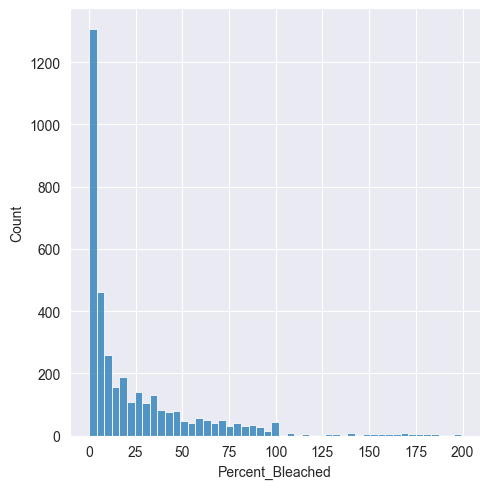

In [122]:
sns.displot(target)

In [123]:
print("Skewness: %f" % target.skew())
print("Kurtosis: %f" % target.kurt())

Skewness: 2.234702
Kurtosis: 5.871021


the data is right skewed and most of the data are clustered at the lower values, leptokurtic distribution which 
means we have either extreme outliers or quite complex relationship that we need to explore 

# Correlation among thermal indicators 

In [124]:
cols_of_interest = [
    "SSTA_Mean", "SSTA_DHWMean", "SSTA_Frequency",
    "SSTA", "TSA",
    "Temperature_Mean", "TSA_Mean",
    "SSTA_DHW", "TSA_DHW"
]

# Keep only columns that exist in your dataframe
cols_existing = [c for c in cols_of_interest if c in df.columns]
corr_subset = df[cols_existing].corr()

corr_subset


,SSTA_Mean,SSTA_DHWMean,SSTA_Frequency,SSTA,TSA,Temperature_Mean,TSA_Mean,SSTA_DHW,TSA_DHW
SSTA_Mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SSTA_DHWMean,NaN,1.000000,0.376061,0.432569,0.340643,-0.257487,0.066111,0.699136,0.787004
SSTA_Frequency,NaN,0.376061,1.000000,0.275988,0.187191,-0.181923,0.043285,0.605038,0.485431
SSTA,NaN,0.432569,0.275988,1.000000,0.715258,-0.202133,-0.039681,0.497424,0.438364
TSA,NaN,0.340643,0.187191,0.715258,1.000000,-0.127574,0.030383,0.440694,0.387536
Temperature_Mean,NaN,-0.257487,-0.181923,-0.202133,-0.127574,1.000000,0.725543,-0.139928,-0.104415
TSA_Mean,NaN,0.066111,0.043285,-0.039681,0.030383,0.725543,1.000000,0.180663,0.271938
SSTA_DHW,NaN,0.699136,0.605038,0.497424,0.440694,-0.139928,0.180663,1.000000,0.902920
TSA_DHW,NaN,0.787004,0.485431,0.438364,0.387536,-0.104415,0.271938,0.902920,1.000000


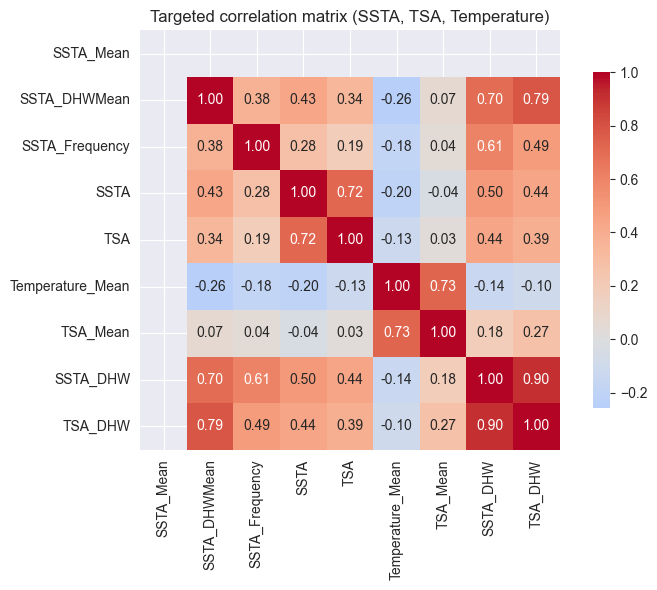

In [125]:
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_subset,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    cbar_kws={"shrink": 0.8}
)
plt.title("Targeted correlation matrix (SSTA, TSA, Temperature)")
plt.tight_layout()
plt.show()

In [126]:
from pandas.api.types import is_numeric_dtype

constant_cols = [c for c in df.columns 
                 if is_numeric_dtype(df[c]) and df[c].nunique() <= 1]

print("Constant columns (drop for correlation):", constant_cols)

df_numeric = df.drop(columns=constant_cols)

pairs_filtered = [
    ("SSTA_DHW", "SSTA_Frequency"),
    ("SSTA_DHW", "TSA_DHW"),
    ("SSTA", "TSA"),
    ("Temperature_Mean", "TSA_Mean")
]

for a, b in pairs_filtered:
    if a in df_numeric.columns and b in df_numeric.columns:
        r = df_numeric[a].corr(df_numeric[b])
        print(f"{a} ↔ {b}: {r:.3f}")


Constant columns (drop for correlation): ['SSTA_Mean']
SSTA_DHW ↔ SSTA_Frequency: 0.605
SSTA_DHW ↔ TSA_DHW: 0.903
SSTA ↔ TSA: 0.715
Temperature_Mean ↔ TSA_Mean: 0.726


there is a correlaton SSTA_DHW ↔ TSA_DHW: 0.899 -> in the feature selection we should probably just use one of them to reduce high dimensionality

In [127]:
# Check count of non-NaN values
print(df[["SSTA_Mean", "SSTA_DHWMean"]].count())

# Check number of unique values
print(df[["SSTA_Mean", "SSTA_DHWMean"]].nunique())

# Check first few values
print(df[["SSTA_Mean", "SSTA_DHWMean"]].head(10))


SSTA_Mean       3696
SSTA_DHWMean    3696
dtype: int64
SSTA_Mean         1
SSTA_DHWMean    311
dtype: int64
   SSTA_Mean  SSTA_DHWMean
0        0.0          2.10
1        0.0          2.12
2        0.0          2.03
3        0.0          2.03
4        0.0          2.03
5        0.0          2.38
6        0.0          2.38
7        0.0          2.51
8        0.0          2.58
9        0.0          2.37


# Physical & Environmental indicators

In [128]:
numeric_pairs = [
    ("Depth_m", "Percent_Bleached"),
    ("Turbidity", "Percent_Bleached"),
    ("Windspeed", "SSTA_Frequency"),
    ("Windspeed", "TSA_Frequency"),
    ("Distance_to_Shore", "Turbidity")
]

# Compute Pearson correlation for each pair
for a, b in numeric_pairs:
    if a in df.columns and b in df.columns:
        # drop missing values for the pair
        valid = df[[a, b]].dropna()
        r = valid[a].corr(valid[b])
        print(f"{a} ↔ {b}: {r:.3f}")

Depth_m ↔ Percent_Bleached: 0.130
Turbidity ↔ Percent_Bleached: -0.071
Windspeed ↔ SSTA_Frequency: 0.025
Windspeed ↔ TSA_Frequency: 0.088
Distance_to_Shore ↔ Turbidity: 0.279


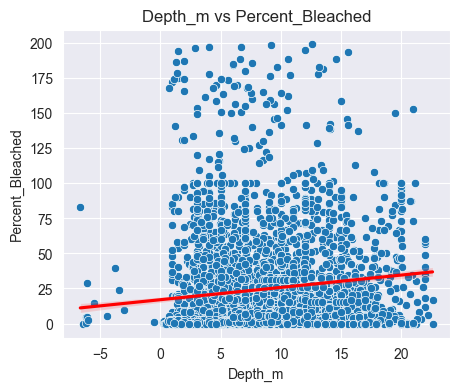

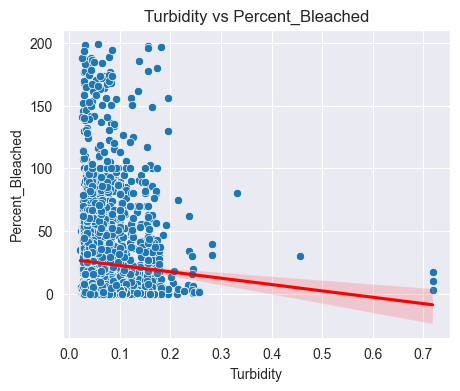

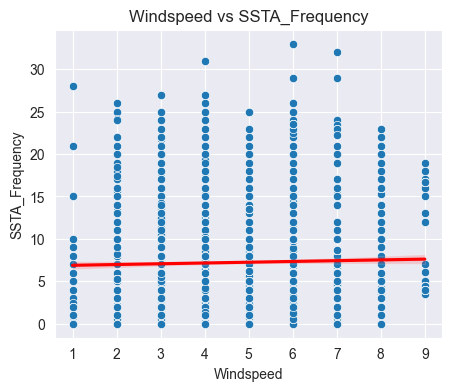

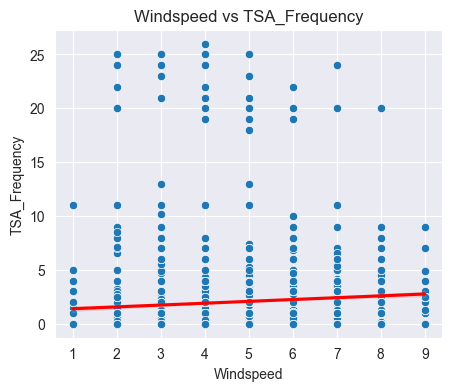

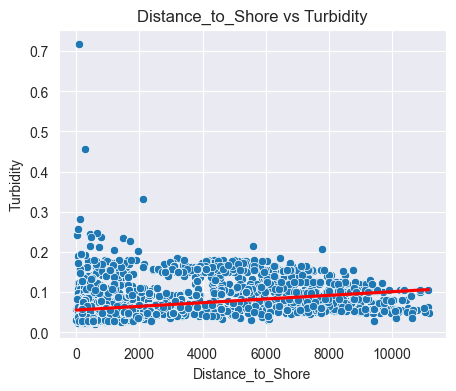

In [129]:
for a, b in numeric_pairs:
    if a in df.columns and b in df.columns:
        plt.figure(figsize=(5,4))
        sns.scatterplot(data=df, x=a, y=b)
        sns.regplot(data=df, x=a, y=b, scatter=False, color="red")  # trend line
        plt.title(f"{a} vs {b}")
        plt.show()


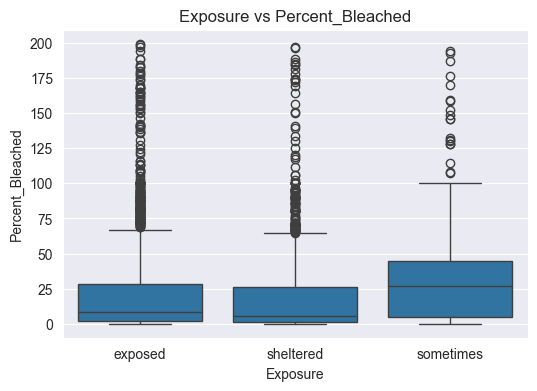

                   sum_sq      df          F        PR(>F)
C(Exposure)  5.434671e+04     2.0  24.414414  2.927113e-11
Residual     4.110326e+06  3693.0        NaN           NaN


In [130]:
# Exposure vs Percent_Bleached
if "Exposure" in df.columns and "Percent_Bleached" in df.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x="Exposure", y="Percent_Bleached", data=df)
    plt.title("Exposure vs Percent_Bleached")
    plt.show()

    # Optional: ANOVA to check statistical differences
    import statsmodels.api as sm
    from statsmodels.formula.api import ols

    model = ols('Percent_Bleached ~ C(Exposure)', data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)
    print(anova_table)


# Site-Level and Structural Correlations

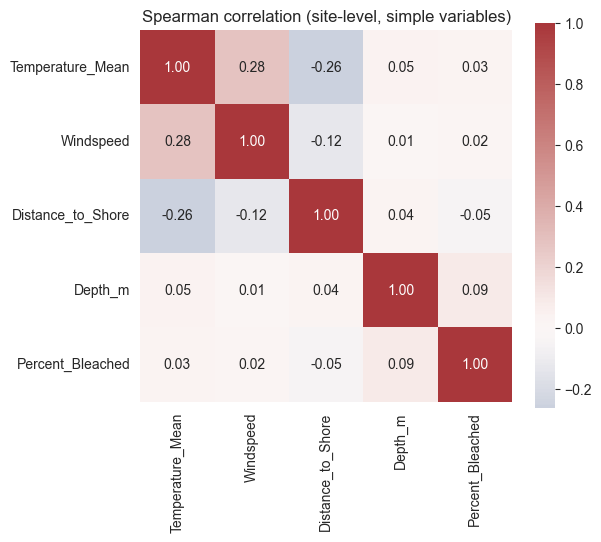

In [131]:
simple_cols = [
    "Temperature_Mean",  # average temperature
    "Windspeed",         # exposure
    "Distance_to_Shore", # offshore vs nearshore
    "Depth_m",           # shallow vs deep
    "Percent_Bleached"   # target
]
site_means_simple = df.groupby("Site_ID")[simple_cols].mean()

corr_simple = site_means_simple.corr(method="spearman")

plt.figure(figsize=(6,5))
sns.heatmap(
    corr_simple,
    annot=True,
    fmt=".2f",
    cmap="vlag",
    center=0,
    square=True
)
plt.title("Spearman correlation (site-level, simple variables)")
plt.show()


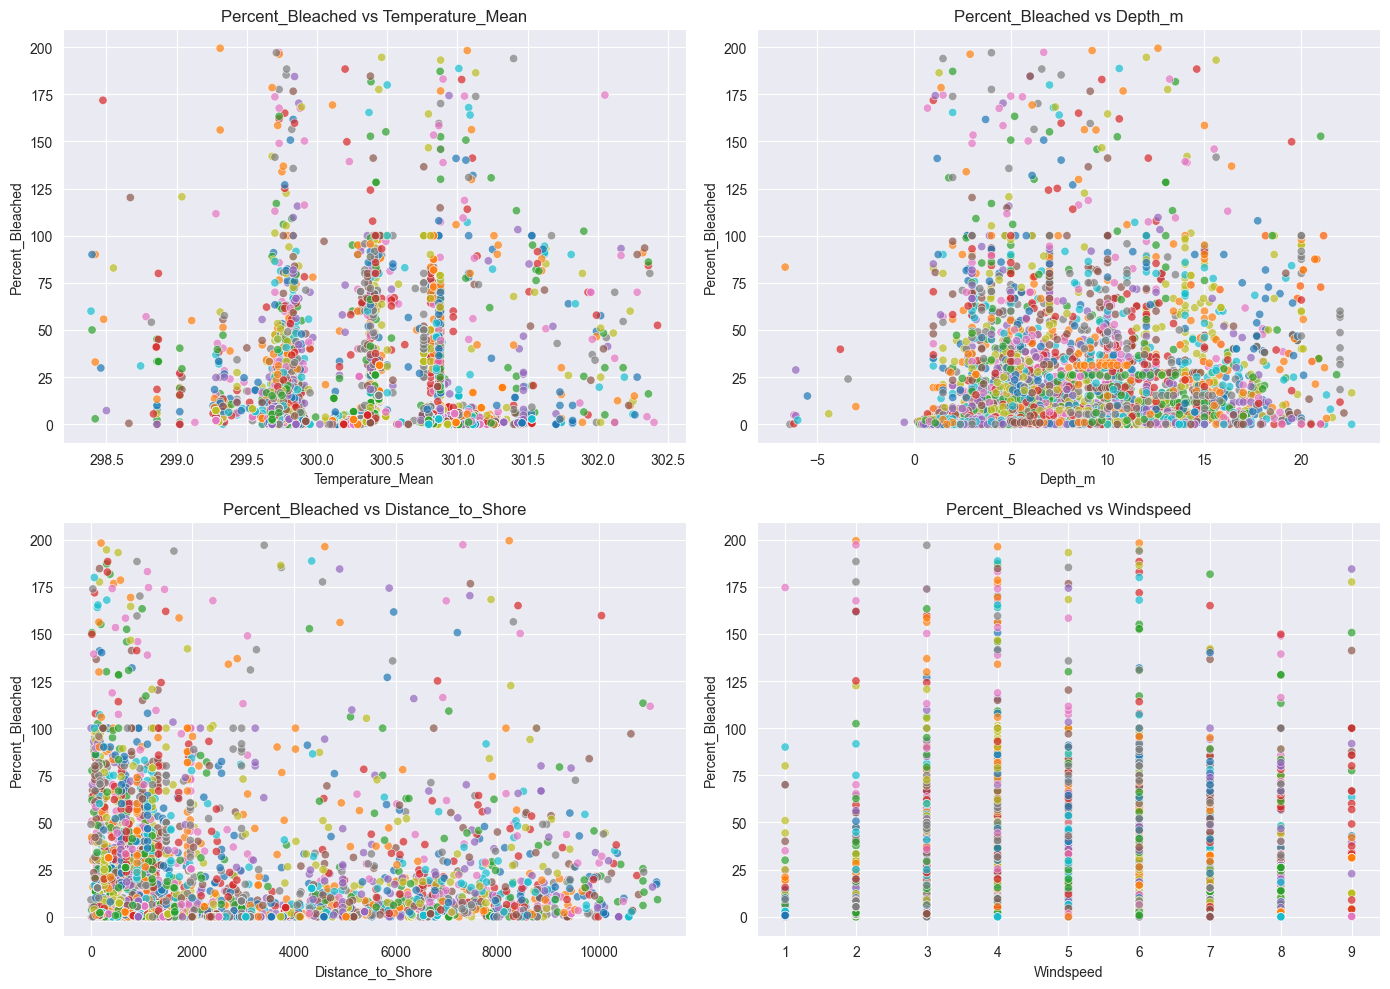

In [132]:
cols = ["Temperature_Mean", "Depth_m", "Distance_to_Shore", "Windspeed"]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))  # 2x2 grid
axes = axes.flatten()  

for ax, col in zip(axes, cols):
    sns.scatterplot(
        data=df, 
        x=col, 
        y="Percent_Bleached", 
        hue="Site_ID", 
        palette="tab10", 
        alpha=0.7,
        ax=ax
    )
    ax.set_title(f"Percent_Bleached vs {col}")
    ax.legend([], [], frameon=False)  

plt.tight_layout()
plt.show()


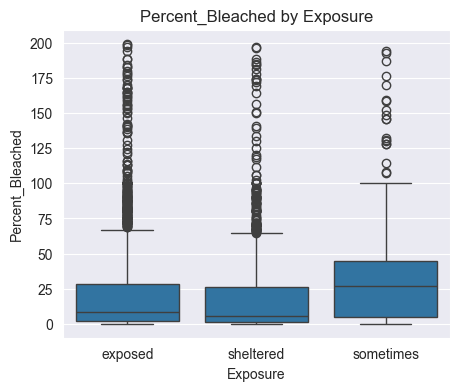

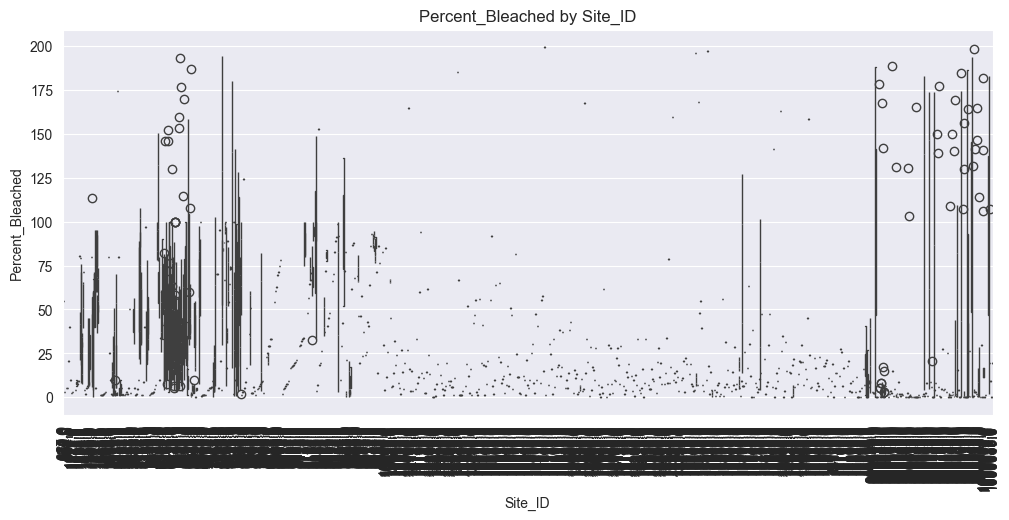

In [133]:
# Exposure
plt.figure(figsize=(5,4))
sns.boxplot(data=df, x="Exposure", y="Percent_Bleached")
plt.title("Percent_Bleached by Exposure")
plt.show()

# Site_ID (many sites → may need rotation)
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x="Site_ID", y="Percent_Bleached")
plt.xticks(rotation=90)
plt.title("Percent_Bleached by Site_ID")
plt.show()


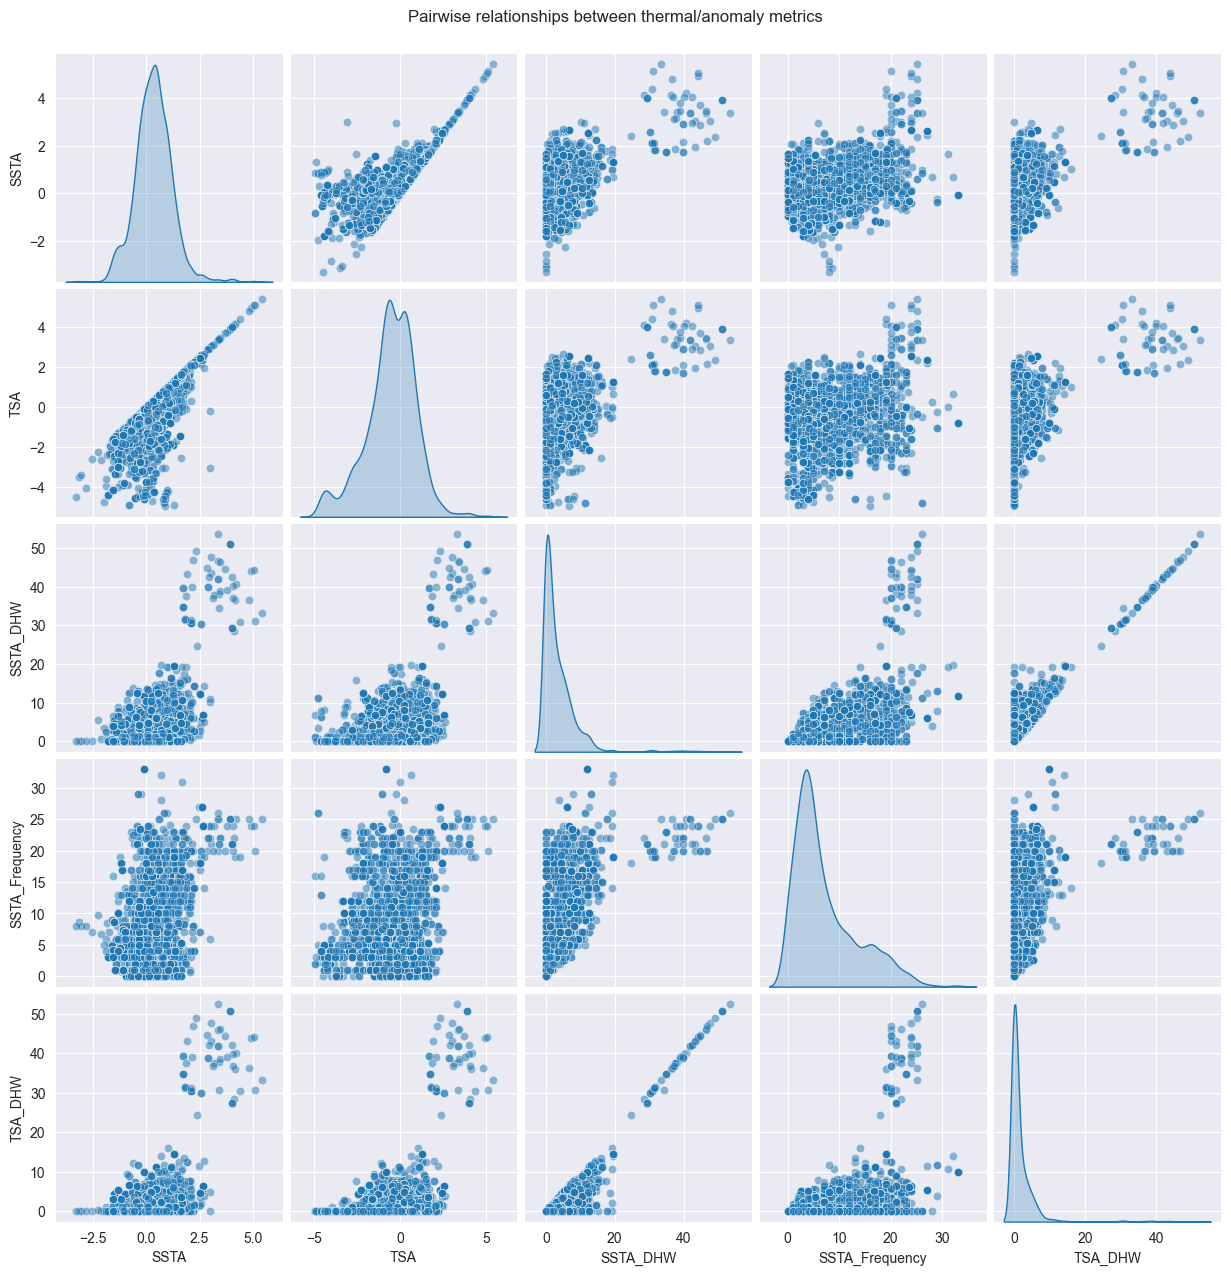

In [134]:
# Select only numeric anomaly/temperature metrics
pairplot_cols = ["SSTA", "TSA", "SSTA_DHW", "SSTA_Frequency", "TSA_DHW"]
sns.pairplot(df[pairplot_cols], kind="scatter", diag_kind="kde", plot_kws={"alpha":0.5})
plt.suptitle("Pairwise relationships between thermal/anomaly metrics", y=1.02)
plt.show()


In [135]:
numeric_cols = [
    'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation',
    'SSTA', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Standard_Deviation',
    'TSA', 'TSA_Mean', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Standard_Deviation',
    'Depth_m', 'Distance_to_Shore', 'Windspeed'
]

X = df[numeric_cols].copy()
y = df['Percent_Bleached']  # target for mutual information

# Standardize for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


/var/folders/m7/5g6r4bs10r13n18xl624y6fm0000gn/T/ipykernel_3258/2651295535.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_series.index, y=mi_series.values, palette="viridis")


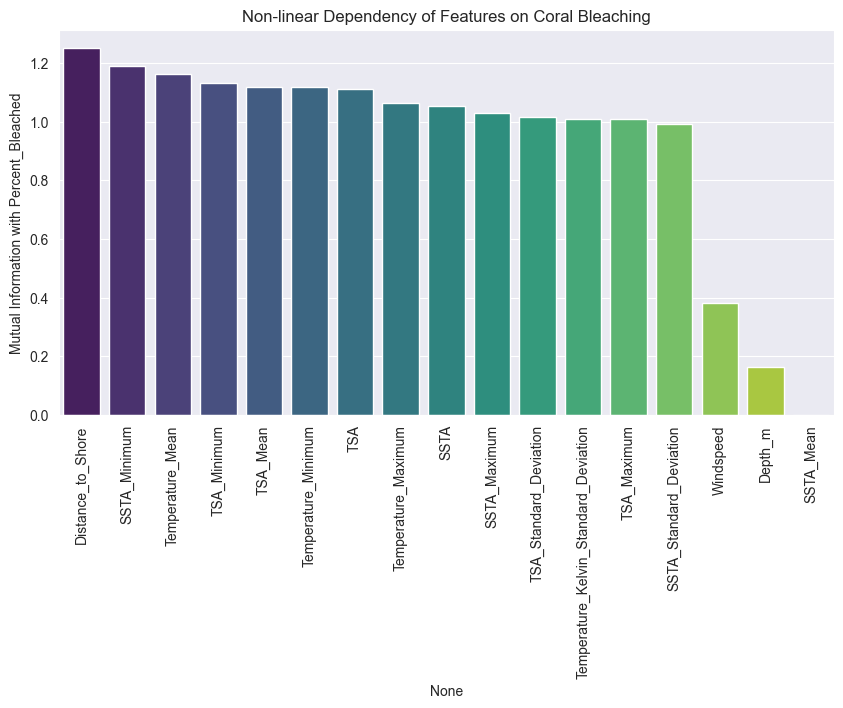

In [136]:
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import seaborn as sns

# Compute MI
mi = mutual_info_regression(X, y, random_state=42)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=mi_series.index, y=mi_series.values, palette="viridis")
plt.xticks(rotation=90)
plt.ylabel("Mutual Information with Percent_Bleached")
plt.title("Non-linear Dependency of Features on Coral Bleaching")
plt.show()


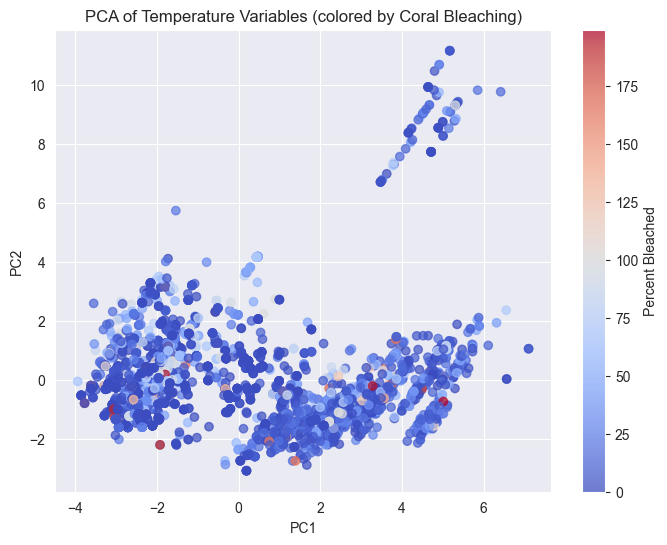

Explained variance ratio: [0.47441317 0.23021481]


In [137]:
from sklearn.decomposition import PCA
import numpy as np

# Select only temperature-related variables
temp_cols = [
    'Temperature_Mean', 'Temperature_Minimum', 'Temperature_Maximum', 'Temperature_Kelvin_Standard_Deviation',
    'SSTA', 'SSTA_Mean', 'SSTA_Minimum', 'SSTA_Maximum', 'SSTA_Standard_Deviation',
    'TSA', 'TSA_Mean', 'TSA_Minimum', 'TSA_Maximum', 'TSA_Standard_Deviation'
]

X_temp = X_scaled[:, [X.columns.get_loc(c) for c in temp_cols]]

# Run PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_temp)

# Visualize
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:,0], pca_result[:,1], c=y, cmap='coolwarm', alpha=0.7)
plt.colorbar(label='Percent Bleached')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of Temperature Variables (colored by Coral Bleaching)")
plt.show()

# Optional: Check explained variance
print("Explained variance ratio:", pca.explained_variance_ratio_)


# Save the dataset
Since we removed some values during EDA (cuz we found information that did not make sense), we need to save the df in another csv file to use it for modelling 


In [138]:
df.to_csv("../data/cleaned_data_after_eda.csv")